# CASE STUDY 6

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel(r'C:\Users\91944\Documents\DATA SCIENCE Certified specialist\Datascience classes\Sec 13\test2\iris.xls')

# Loading the dataset

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# DATA PREPROCESSING

In [6]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

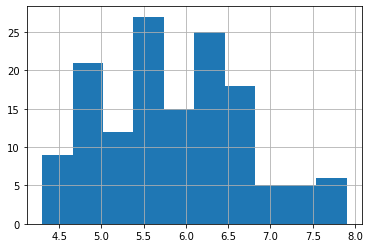

In [7]:
df['SL'].hist()

<AxesSubplot:>

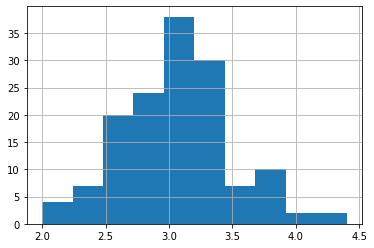

In [8]:
df['SW'].hist()

<AxesSubplot:>

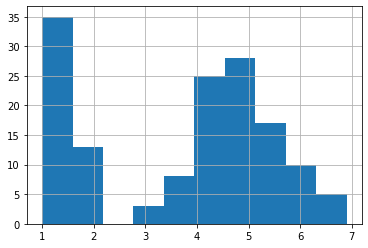

In [9]:
df['PL'].hist()

<AxesSubplot:>

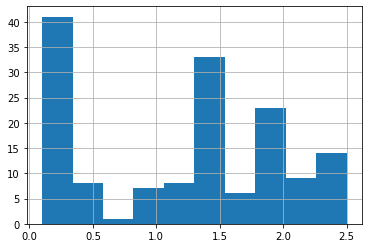

In [10]:
df['PW'].hist()

In [11]:
# Filling missing values

In [12]:
df['SL']= df['SL'].fillna(df['SL'].median())
df['SW']= df['SW'].fillna(df['SW'].mean())
df['PL']= df['PL'].fillna(df['PL'].median())

In [13]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [15]:
# scatterplot to see the datapoints
colors = ['red', 'orange', 'blue']
Classification = ['Iris-virginica','Iris-versicolor','Iris-setosa']

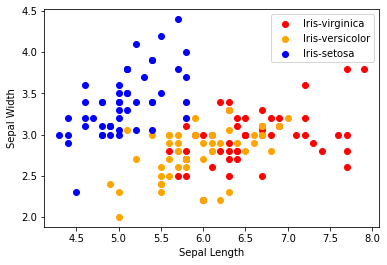

In [16]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SL'], x['SW'], c = colors[i], label=Classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

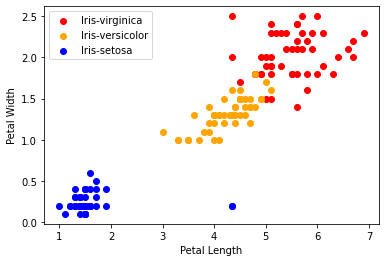

In [17]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['PL'], x['PW'], c = colors[i], label=Classification[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

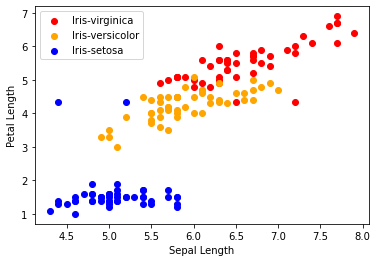

In [18]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SL'], x['PL'], c = colors[i], label=Classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

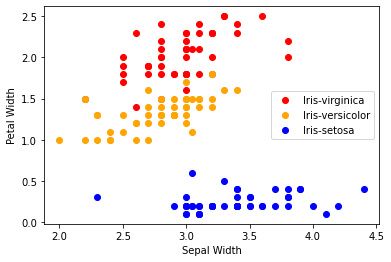

In [19]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['SW'], x['PW'], c = colors[i], label=Classification[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

<AxesSubplot:>

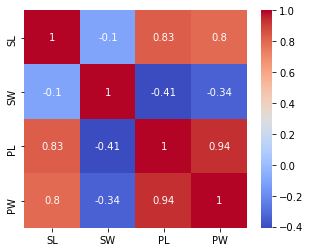

In [20]:
#Heatmap to check the corelation
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [21]:
#not dropping any columns since it is not a large dataset

# ENCODING

In [29]:
#LABEL ENCODING on classification
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df['Classification'] = le.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.049306,3.780000,1.198667,1.000000
std,0.808567,0.421884,1.729424,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# TRAINING THE MODEL

In [32]:
X = df.drop(['Classification'],axis=1)
y = df['Classification']

In [33]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.3)

In [34]:
# Applying Standard Scaling
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
X=scaler.fit_transform(X)

In [35]:
X.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [36]:
X=pd.DataFrame(X)

In [37]:
X.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.566381e-16,-2.897682e-16,1.421085e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.927530e+00,-2.495522e+00,-1.612857e+00,-1.444450e+00
25%,-8.107207e-01,-5.929136e-01,-1.264758e+00,-1.181504e+00
50%,-6.618128e-02,-1.172615e-01,3.306937e-01,1.332259e-01
75%,6.783581e-01,5.367602e-01,7.658171e-01,7.905908e-01
max,2.539707e+00,3.212303e+00,1.810113e+00,1.710902e+00


In [38]:
X_train.shape

(105, 4)

In [39]:
#logistic regression 
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [41]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("F1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  0.9777777777777777
Precision is:  0.9777777777777777
Recall is:  0.9777777777777777
F1 score is:  0.9777777777777777


C:\Users\91944\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [42]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [43]:
#Only one misclassification

# K Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
acc_values =[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors= k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred)
    acc_values.append(acc)


In [45]:
acc_values

[0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

Text(0, 0.5, 'Accuracy')

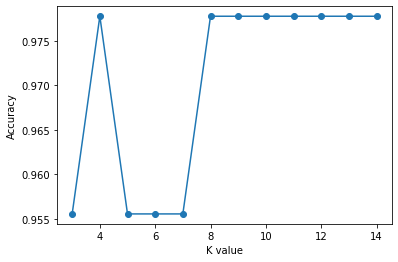

In [46]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [47]:
classifier = KNeighborsClassifier(n_neighbors= 4, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [48]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("F1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  0.9777777777777777
Precision is:  0.9777777777777777
Recall is:  0.9777777777777777
F1 score is:  0.9777777777777777


C:\Users\91944\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [49]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [50]:
#One misclassification

In [51]:
classifier = KNeighborsClassifier(n_neighbors= 10, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [52]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("F1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  0.9777777777777777
Precision is:  0.9777777777777777
Recall is:  0.9777777777777777
F1 score is:  0.9777777777777777


C:\Users\91944\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [53]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# Logistic Regression Model

In [54]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [55]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("F1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  0.9777777777777777
Precision is:  0.9777777777777777
Recall is:  0.9777777777777777
F1 score is:  0.9777777777777777


C:\Users\91944\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [56]:
df.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.049306,3.780000,1.198667,1.000000
std,0.808567,0.421884,1.729424,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=dt.predict(X_test)

In [59]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  1.0


In [60]:
y_test.value_counts()

0    19
2    13
1    13
Name: Classification, dtype: int64

In [61]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# SVM [Support Vector Machine]

In [63]:
# 1. Linear SVM 
from sklearn.svm import SVC
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [64]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  1.0


In [65]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [66]:
# 2. Polynomial SVM 
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred= svm_poly.predict(X_test)

In [67]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.9777777777777777


In [68]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [69]:
# 3. Radial based kernel SVM
svm_radial= SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred= svm_radial.predict(X_test)

In [70]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))

Accuracy is:  0.9777777777777777


In [71]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

#  Random Forest Model

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [73]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("F1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  1.0
F1 score is:  1.0


C:\Users\91944\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [74]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [76]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("F1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  1.0
F1 score is:  1.0


C:\Users\91944\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


# Extreme Gradient Boosting

In [77]:
import sys
!{sys.executable} -m pip install xgboost

In [78]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

[21:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91944\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
y_pred=xgb.predict(X_test)

In [80]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("F1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))

Accuracy is:  1.0
F1 score is:  1.0


In [81]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# Inference:

Accuracy scores obtained for different models are:
Logistic model=0.97,   KNN(K=4) =0.97,   Decision tree =1.0,   SVM leniar =1.0,   SVM polynomial =0.97,   SVM radial =0.97  Random Forest =1.0,   Gradient boosting =1.0,    Extreme gradient boosting =1.0  

Since we obtained 100% accuracy in several models like Linear SVM, Decision tree, Random Forest, Gradient boosting, Extreme Gradient boosting, we could follow any of these models 